MidiTrack([
  Message('control_change', channel=0, control=64, value=127, time=1359),
  Message('note_on', channel=0, note=70, velocity=52, time=302),
  Message('note_on', channel=0, note=72, velocity=61, time=34),
  Message('note_on', channel=0, note=67, velocity=48, time=12),
  Message('note_on', channel=0, note=56, velocity=46, time=0),
  Message('note_on', channel=0, note=75, velocity=68, time=5),
  Message('note_on', channel=0, note=79, velocity=78, time=689),
  Message('note_on', channel=0, note=56, velocity=0, time=709),
  Message('note_on', channel=0, note=70, velocity=0, time=0),
  Message('note_on', channel=0, note=65, velocity=52, time=3),
  Message('note_on', channel=0, note=74, velocity=59, time=1),
  Message('note_on', channel=0, note=72, velocity=0, time=1),
  Message('note_on', channel=0, note=70, velocity=57, time=0),
  Message('note_on', channel=0, note=58, velocity=45, time=1),
  Message('control_change', channel=0, control=64, value=0, time=5),
  Message('control_ch

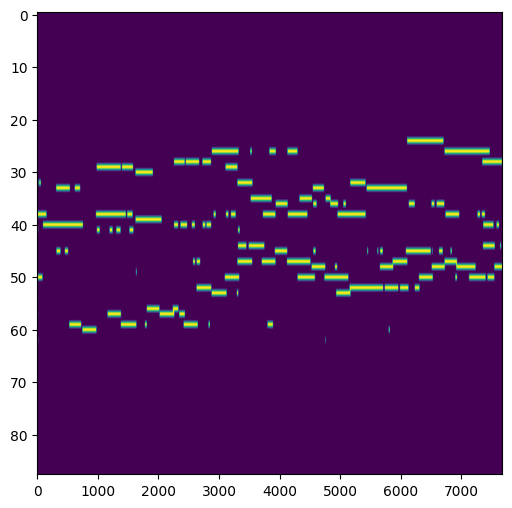

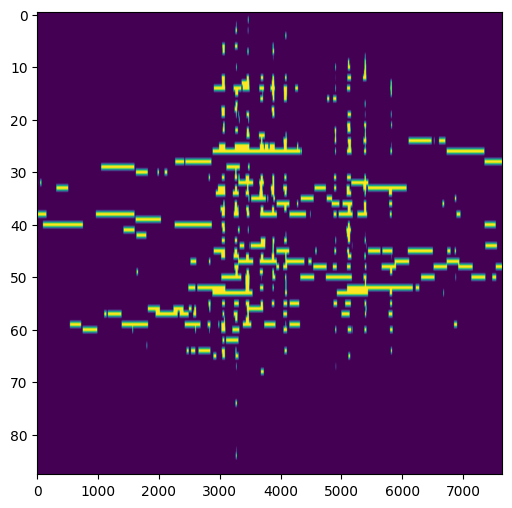

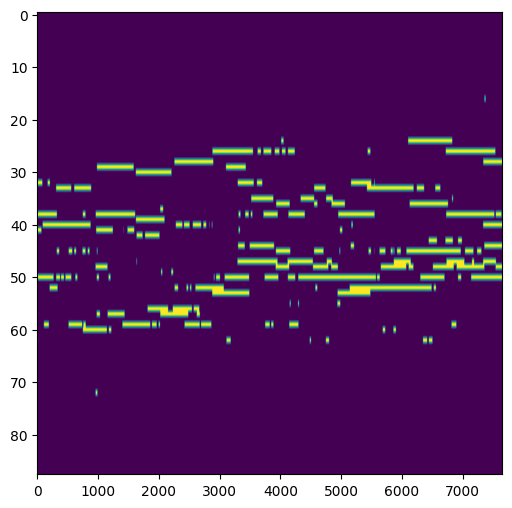

In [33]:
import mido 
import numpy as np
import matplotlib.pyplot as plt
twice = "twice.mid"
mid = mido.MidiFile(twice, clip=True)
print(mid.tracks[1])

def writeMidi(arr, fname):
    mticks = 384
    midifile = mido.MidiFile(ticks_per_beat=mticks)
    track = mido.MidiTrack()
    track2 = mido.MidiTrack()
    midifile.tracks.append(track2)
    midifile.tracks.append(track)
    # for i in range(0, 88):
    #     j = 0
    #     while(j < 7680):
    #         if(arr[i,j] == 1):
    #             beg = j
    #             while(j < 7680 and arr[i, j] == 1):
    #                 j+=1
    #             track.append(mido.Message('note_on', channel=0, note=i+21, velocity=127, time=j-beg))
    #         if(j >= 7680):
    #             break
    #         if(arr[i,j] == 0):
    #             beg = j
    #             while(j < 7680 and arr[i, j] == 0):
    #                 j+=1
    #             track.append(mido.Message('note_on', channel=0,note=i+21, velocity=0, time=j-beg))
    #         j+=1
    notes = np.zeros(88)
    prevt = 0
    for i in range(0, 7680):
        for j in range(0, 88):
            if(notes[j] != arr[j,i]):
                if(notes[j] == 1):
                    track.append(mido.Message('note_on', channel = 0, note = j+21, velocity=0, time=i-prevt))
                    notes[j] = 0
                    prevt = i
                else:
                    track.append(mido.Message('note_on', channel = 0, note = j+21, velocity=127, time=i-prevt))
                    notes[j] = 1
                    prevt = i
    track.append(mido.MetaMessage('end_of_track'))
    midifile.save(fname)
    #print(midifile.tracks[1])  



    f = fname
    #print(fname)
    mid = mido.MidiFile(fname, clip=True)
    mticks = mid.ticks_per_beat
    tempo = 500000
    for msg in mid.tracks[0]:
        if(msg.type == 'set_tempo'):
            tempo = msg.tempo
            break

    mlen = mid.length
    
    #print(mticks)
    out = np.zeros((88, int(mido.second2tick(mlen, mticks, tempo))+1), dtype=np.int8)
    indxs = np.zeros(88)
    curtime = 0
    for msg in mid.tracks[1]:            
        
        for i in range(msg.time):
            out[:, curtime + i] = indxs # maybe copy
        curtime += msg.time

        if msg.type == 'note_on':
            on_value = 1 if msg.velocity != 0 else 0
            if(on_value):
                indxs[msg.note - 21] = 1
            else:
                indxs[msg.note - 21] = 0

    while(curtime < out.shape[1]):
        out[:, curtime] = indxs
        curtime += 1
        
    t = int(mido.second2tick(10, mticks, tempo))

    #print(mticks)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(out[:, 0:t], aspect='auto')

  

data = np.load('/home/albyyuggle/Code/CS543/project/predcrnn28_2.npy')
print(data.shape)
writeMidi(data[0, : ,:], 'predcrnn28_2.mid')
data = np.load('/home/albyyuggle/Code/CS543/project/predcrnnbalanced_2.npy')
print(data.shape)
writeMidi(data[0, : ,:], 'predcrnnbalanced_2.mid')
data = np.load('/home/albyyuggle/Code/CS543/project/predcrnnrwbalanced_2.npy')
print(data.shape)
writeMidi(data[0, : ,:], 'predcrnnrwbalanced_2.mid')


# data = np.load('/home/albyyuggle/Code/CS543/project/real_2.npy')
# print(data.shape)
# writeMidi(data[0, : ,:], 'real_2.mid')